Tutorial 2
==========

In this second tutorial, the NMR relaxation time T1 of a PEG-water mixture is measured using NMRforMD. 

The system is a short molecular dynamics trajectory of bulk TIP4P water molecules in the NVT ensemble simulated with [LAMMPS](https://www.lammps.org/) (temperature 300°K). 

If you want to generate longer trajectory files, the 
input files are available in this [repository](https://github.com/simongravelle/nmrformd/tree/main/tests).

![](https://raw.githubusercontent.com/simongravelle/nmrformd/main/tests/peg_water/peg-water.png)

File preparation
----------------

Clone the NMRforMD repository:

```bash

    git clone git@github.com:simongravelle/nmrformd.git

```

Define a path to the data file:

In [11]:
datapath = "../../../tests/peg_water/"

Import the libraries
--------------------

Open a Python script, import numpy, MDAnalysis, pyplot, and NMRforMD:

In [12]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

Create a MDAnalysis universe
----------------------------

Import the configuration file and the trajectory:

In [13]:
u = mda.Universe(datapath+"PEG_H2O.data", datapath+"traj.xtc")

Let us extract a few information from the universe:

In [14]:
n_water_molecules = u.atoms.select_atoms("type 1").atoms.n_atoms
print(f"The number of water molecules is {n_water_molecules}")
n_atom_peg = u.atoms.select_atoms("type 3 4 5 6 7").atoms.n_atoms
print(f"The number of atoms in the peg molecules is {n_atom_peg}")
timestep = np.int32(u.trajectory.dt)
print(f"The timestep is {timestep} ps")
total_time = np.int32(u.trajectory.totaltime)
print(f"The total simulation time is {total_time} ps")

The number of water molecules is 247
The number of atoms in the peg molecules is 198
The timestep is 1 ps
The total simulation time is 1000 ps


PEG vs H2O rotational dynamics
------------------------------

Let us create 3 groups of atoms, for H2O, PEG, and ALL respectively, containing only the hydrogen atoms:

In [26]:
group_H2O = "type 2"
group_PEG = "type 5 7"
group_ALL = "type 2 5 7"

Then, let us measure intra_molecular T1 and caracteristic time $\tau_R$ for water and PEG:

In [27]:
nmr_H2O = nmrmd.NMR(u, [group_H2O, group_H2O], number_i=200, type_analysis="intra_molecular")
print(f"Characteristic time for H2O : tauR = {np.round(nmr_H2O.tau,2)} s")
nmr_PEG = nmrmd.NMR(u, [group_PEG, group_PEG], number_i=0, type_analysis="intra_molecular")
print(f"Characteristic time for PEG : tauR = {np.round(nmr_PEG.tau,2)} s")

Characteristic time for H2O : tauR = 1.57 s
Characteristic time for PEG : tauR = 10.64 s


Calculation takes about 1 minutes. Results indicate longer characteristic rotation times in the case of the PEG molecules. 
Let us compare the two correlation functions:

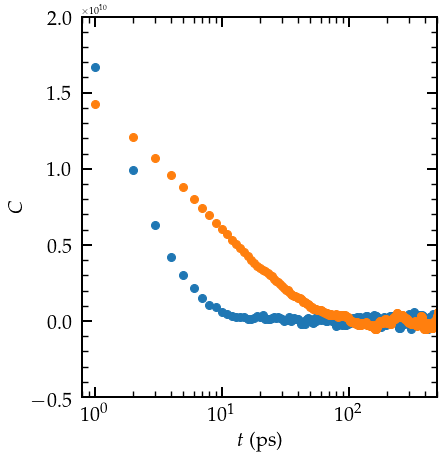

In [25]:
from matplotlib import pyplot as plt
fontsize = 20
font = {'color':  'black', 'weight': 'normal', 'size': fontsize}
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(1, 2, 1)
ax1.semilogx(nmr_H2O.t[:-250], nmr_H2O.gij[0][:-250], 'o', markersize=8)
ax1.semilogx(nmr_PEG.t[:-250], nmr_PEG.gij[0][:-250], 'o', markersize=8)
ax1.set_xlabel(r"$t$ (ps)", fontdict=font)
ax1.set_ylabel(r'$C$', fontdict=font)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.tick_params(axis='x', which='major', pad=10)
ax1.tick_params(axis='y', which='major', pad=10)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlim(0.8, 500)
plt.ylim(-0.5e10, 2e10)
plt.show()

Relative contribution of PEG and H2O to NMR relaxation time T1
--------------------------------------------------------------

Let us extract the relative contribution of PEG and H2O to T1, and compare it to the total T1 spectrum. In all cases, we select
group_ALL as the second "group j", to ensure that all neighbors are being considered.

In [28]:
nmr_H2O = nmrmd.NMR(u, [group_H2O, group_ALL], number_i=200)
nmr_PEG = nmrmd.NMR(u, [group_PEG, group_ALL], number_i=0)
nmr_ALL = nmrmd.NMR(u, [group_ALL, group_ALL], number_i=200)


This calculation takes a few minutes to complete. When its done, let us plot the R1 spectrums:

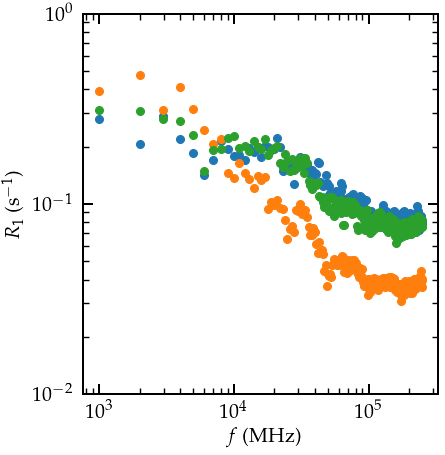

In [34]:
from matplotlib import pyplot as plt
fontsize = 20
font = {'color':  'black', 'weight': 'normal', 'size': fontsize}
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(1, 2, 1)
ax1.loglog(nmr_H2O.f[:-250], nmr_H2O.R1[:-250], 'o', markersize=8)
ax1.loglog(nmr_PEG.f[:-250], nmr_PEG.R1[:-250], 'o', markersize=8)
ax1.loglog(nmr_ALL.f[:-250], nmr_ALL.R1[:-250], 'o', markersize=8)
ax1.set_xlabel(r"$f$ (MHz)", fontdict=font)
ax1.set_ylabel(r'$R_1$ (s$^{-1}$)', fontdict=font)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.tick_params(axis='x', which='major', pad=10)
ax1.tick_params(axis='y', which='major', pad=10)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.xlim(0.8, 500)
plt.ylim(0.01, 1)
plt.show()

From the results, it appears that the total spectrum is dominated by the H2O contribution, which makes sence given that there are more
H2O hydrogens than there are PEG hydrogens in the system. 